distribution of max categories per basin
distribution of current categories
TC length (in days and in bins)
max wind speed change
lightning distribution


In [53]:
import pandas as pd
pd.set_option('display.max_rows', 500)


In [5]:
inner_core_joined = pd.read_csv(r"C:\Users\user\Desktop\25 WI\innercore_timebin_joined.csv")
rainband_joined = pd.read_csv(r"C:\Users\user\Desktop\25 WI\rainband_timebin_joined.csv")

In [98]:
storm_basin_match = inner_core_joined[['storm_code','basin']].drop_duplicates()

In [63]:
WWLLN_innercore_w_time = pd.read_csv(r"C:\Users\user\Desktop\25 WI\WWLLN_innercore_w_time_updated.csv")


In [ ]:
WWLLN_innercore_w_time.shape

In [87]:
WWLLN_innercore_w_time = WWLLN_innercore_w_time.merge(storm_basin_match, on='storm_code', how='left')
WWLLN_innercore_w_time.head()

MemoryError: Unable to allocate 10.0 GiB for an array with shape (1344559841,) and data type int64

(471, 4)


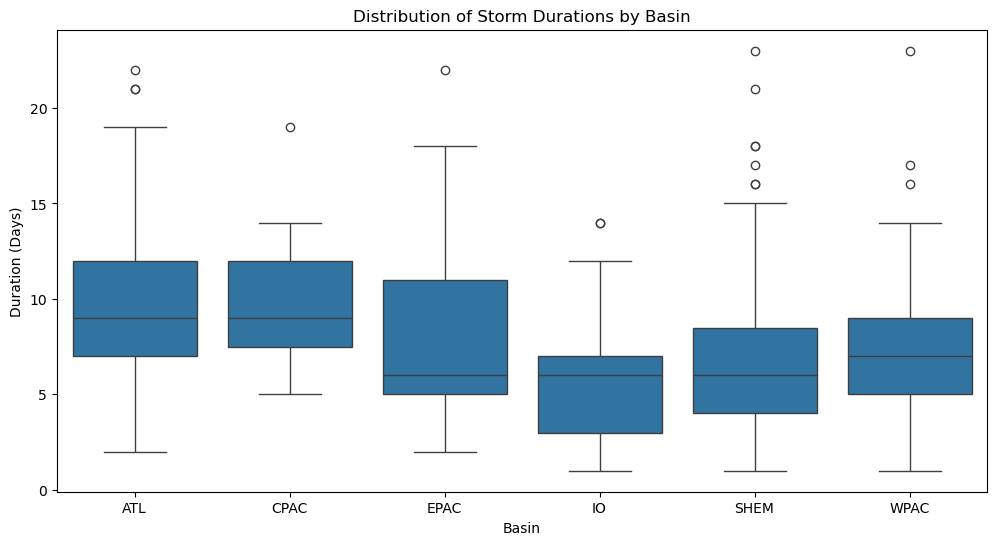

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime column is in datetime format
WWLLN_innercore_w_time['datetime'] = pd.to_datetime(WWLLN_innercore_w_time['datetime'])

# Calculate duration for each storm (max - min datetime)
storm_durations = WWLLN_innercore_w_time.groupby(['storm_code'])['datetime'].agg(['min', 'max']).reset_index()
storm_durations['duration_days'] = (storm_durations['max'] - storm_durations['min']).dt.days  # Convert to days

# Remove non-positive durations (if any)
storm_durations = storm_durations[storm_durations['duration_days'] > 0]
print(storm_durations.shape)
storm_durations = storm_durations.merge(storm_basin_match, on='storm_code', how='inner')
# Plot boxplots for each basin
plt.figure(figsize=(12, 6))
sns.boxplot(data=storm_durations, x='basin', y='duration_days')

# Labels and title
plt.xlabel('Basin')
plt.ylabel('Duration (Days)')
plt.title('Distribution of Storm Durations by Basin')

# Show plot
plt.show()


In [26]:
inner_core_joined.head()

,time_bin,storm_code,lightning_count,year,month,day,hour,minute,lat,lon,pressure,knots,storm_name,category,basin,minute_right,24_hour_knots_diff,24_hour_pressure_diff,TC_Category,Intensification_Category
0,2010-06-21 07:00:00,ATL_10_1,1,2010,6,21,7,0,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
1,2010-06-21 07:30:00,ATL_10_1,0,2010,6,21,7,30,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
2,2010-06-21 08:00:00,ATL_10_1,0,2010,6,21,8,0,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
3,2010-06-21 08:30:00,ATL_10_1,0,2010,6,21,8,30,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
4,2010-06-21 09:00:00,ATL_10_1,0,2010,6,21,9,0,14.0,-67.6,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral


In [40]:
inner_core_joined.groupby(['basin'])['category'].value_counts().sort_index(level=['basin','category'])

basin  category
ATL    1           15426
       2            8294
       3            4832
       4           10238
       5            2354
CPAC   1            1526
       2            1629
       5             402
EPAC   1            9074
       2            3875
       3            3437
       4           14826
       5            1918
IO     1            3500
       2             434
       3            1714
       4            2131
       5             266
SHEM   1           12061
       2            8021
       3            6555
       4           14736
       5            5155
WPAC   1           11006
       2            5616
       3            6228
       4           15985
       5           15881
Name: category, dtype: int64

In [37]:
inner_core_joined.groupby('basin')['TC_Category'].value_counts()

basin  TC_Category 
ATL    Unidentified    29251
       1                6162
       2                2483
       3                1606
       4                1366
       5                 276
CPAC   Unidentified     2737
       1                 510
       2                 154
       4                 102
       3                  36
       5                  18
EPAC   Unidentified    22597
       1                4433
       2                2166
       3                2101
       4                1721
       5                 112
IO     Unidentified     5537
       1                1236
       2                 426
       4                 416
       3                 406
       5                  24
SHEM   Unidentified    31142
       1                6503
       2                3728
       3                2638
       4                2217
       5                 300
WPAC   Unidentified    31435
       1                8483
       2                4640
       4               

C:\Users\user\AppData\Local\Temp\ipykernel_25488\1324783050.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_25488\1324783050.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_25488\1324783050.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_25488\1324783050.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

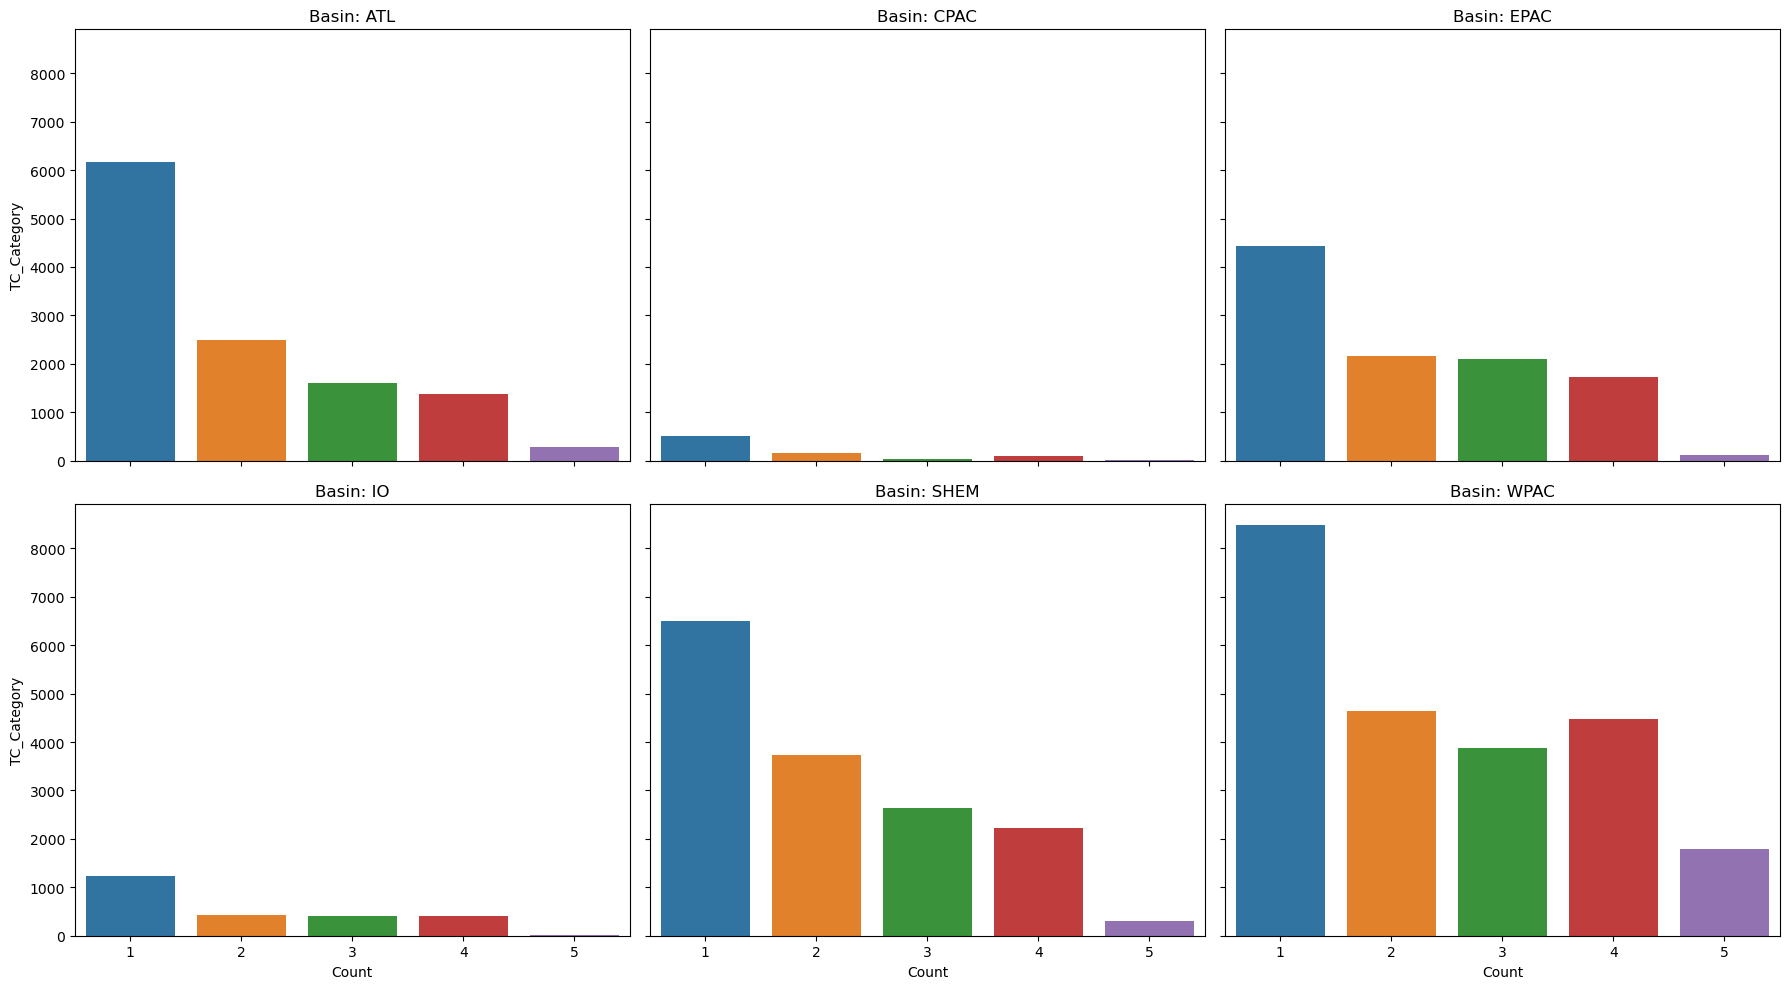

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out 'Unidentified' from TC_Category
filtered_data = inner_core_joined[inner_core_joined['TC_Category'] != 'Unidentified']

category_counts = filtered_data.groupby(['basin', 'TC_Category']).size().reset_index(name='count')

# Get unique basins
basins = category_counts['basin'].unique()

# Define a color palette for consistency across plots
unique_categories = category_counts['TC_Category'].unique()
palette = sns.color_palette("tab10", len(unique_categories))
category_colors = {category: palette[i] for i, category in enumerate(unique_categories)}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each basin and plot a bar chart
for i, basin in enumerate(basins):
    ax = axes[i]
    
    # Filter data for the current basin
    basin_data = category_counts[category_counts['basin'] == basin]
    
    # Plot bar chart
    sns.barplot(
        data=basin_data, 
        y='count', 
        x='TC_Category', 
        ax=ax, 
        palette=category_colors
    )
    
    ax.set_title(f'Basin: {basin}')
    ax.set_xlabel('Count')
    ax.set_ylabel('TC_Category')

# Remove empty subplots if basins < 6
for j in range(len(basins), 6):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [55]:
current_category_by_basin = (
    inner_core_joined
    .groupby(['basin', 'storm_code'])['TC_Category']
    .value_counts()
    .sort_index(level=['storm_code', 'TC_Category'])
)
current_category_by_basin.head(500)

basin  storm_code  TC_Category 
ATL    ATL_10_1    1                42
                   Unidentified    418
       ATL_10_11   1               104
                   2                84
                   3                24
                   4               216
                   Unidentified    233
       ATL_10_12   1                96
                   2                18
                   3                30
                   4                30
                   Unidentified    296
       ATL_10_13   1                18
                   2                28
                   3                12
                   Unidentified    310
       ATL_10_14   1                18
                   Unidentified    357
       ATL_10_17   1                78
                   Unidentified    321
       ATL_10_18   1                60
                   2                48
                   Unidentified    253
       ATL_10_19   1                48
                   Unidentified 

In [39]:
inner_core_joined.groupby('basin')['Intensification_Category'].value_counts()

basin  Intensification_Category
ATL    Neutral                     19954
       Intensifying                10855
       Unidentified                 4032
       Weakening                    3376
       Rapidly Intensifying         2323
       Rapidly Weakening             604
CPAC   Neutral                      1569
       Intensifying                 1057
       Weakening                     363
       Unidentified                  336
       Rapidly Intensifying          120
       Rapidly Weakening             112
EPAC   Neutral                     12737
       Intensifying                 9033
       Unidentified                 3936
       Weakening                    3665
       Rapidly Intensifying         2911
       Rapidly Weakening             848
IO     Neutral                      2709
       Intensifying                 2290
       Unidentified                 1217
       Rapidly Intensifying          739
       Weakening                     648
       Rapidly Weakening 

C:\Users\user\AppData\Local\Temp\ipykernel_25488\35494133.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_25488\35494133.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_25488\35494133.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_25488\35494133.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

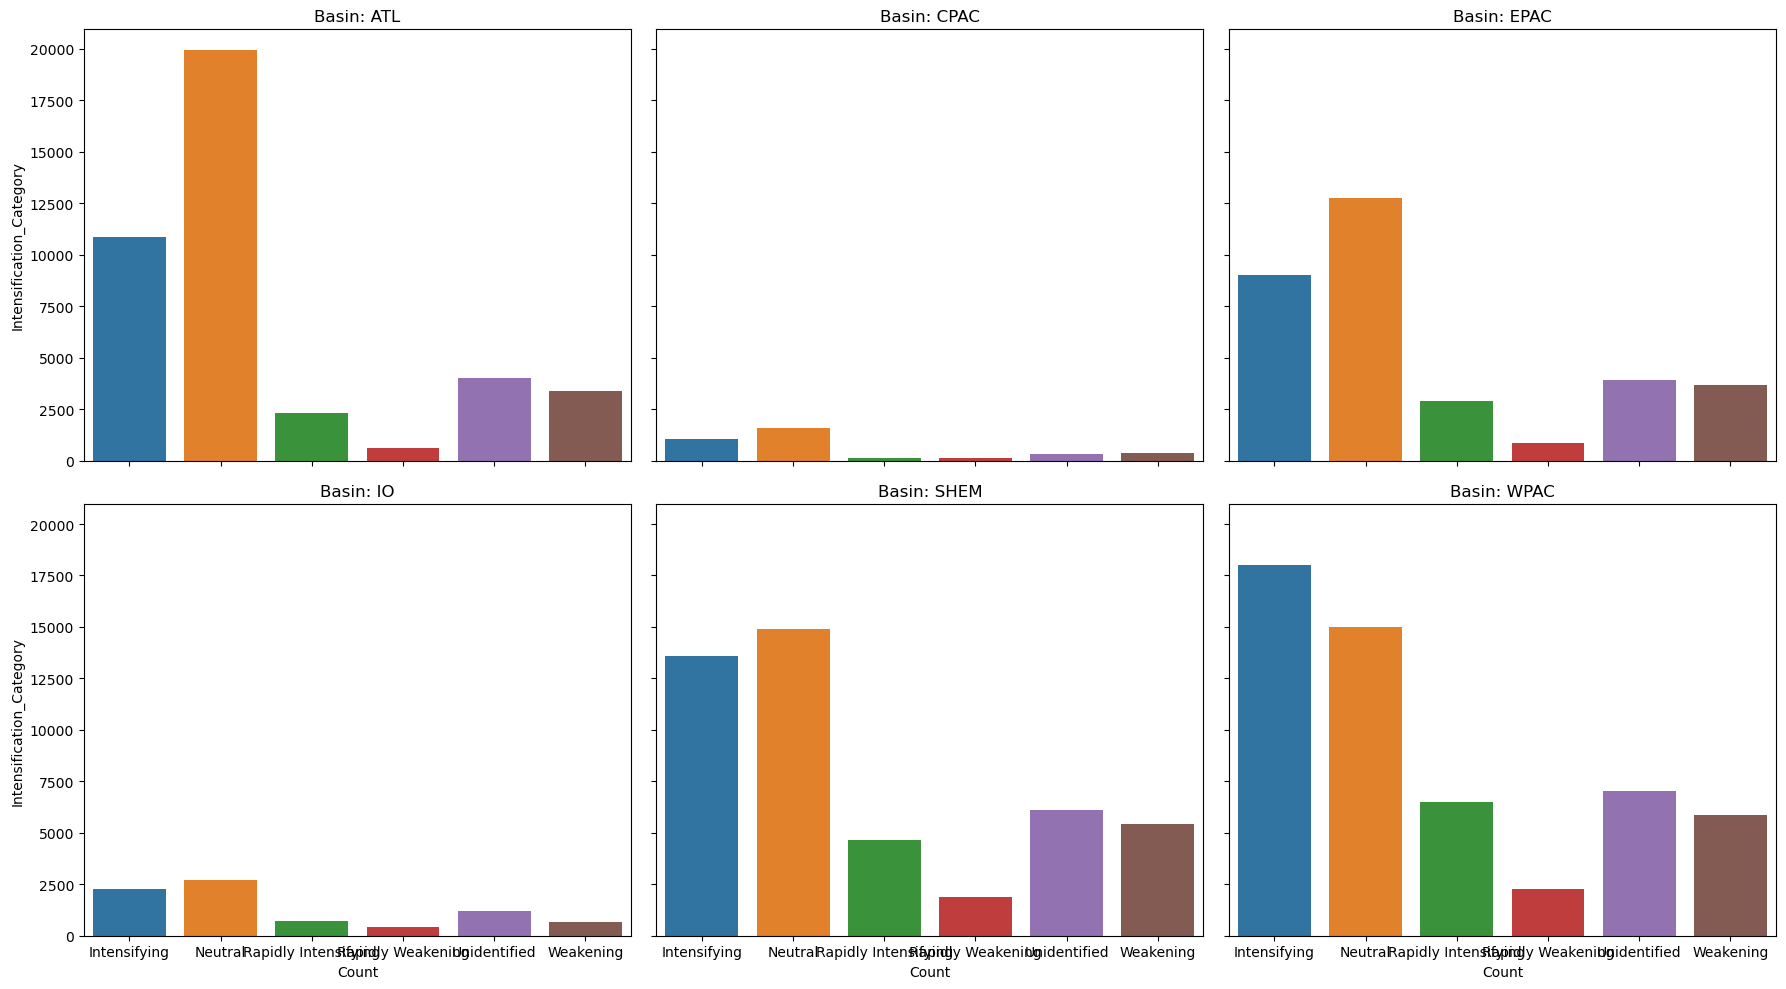

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data and count occurrences of each intensification category per basin
category_counts = inner_core_joined.groupby(['basin', 'Intensification_Category']).size().reset_index(name='count')

# Get unique basins
basins = category_counts['basin'].unique()

# Define a color palette for consistency across plots
unique_categories = category_counts['Intensification_Category'].unique()
palette = sns.color_palette("tab10", len(unique_categories))
category_colors = {category: palette[i] for i, category in enumerate(unique_categories)}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each basin and plot a bar chart
for i, basin in enumerate(basins):
    ax = axes[i]
    
    # Filter data for the current basin
    basin_data = category_counts[category_counts['basin'] == basin]
    
    # Plot bar chart
    sns.barplot(
        data=basin_data, 
        y='count', 
        x='Intensification_Category', 
        ax=ax, 
        palette=category_colors
    )
    
    ax.set_title(f'Basin: {basin}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Intensification_Category')

# Remove empty subplots if basins < 6
for j in range(len(basins), 6):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [59]:
current_category_by_basin = (
    inner_core_joined
    .groupby(['basin', 'storm_code'])['Intensification_Category']
    .value_counts()
    .sort_index(level=['storm_code', 'Intensification_Category'])
)
current_category_by_basin.head(500)

basin  storm_code  Intensification_Category
ATL    ATL_10_1    Intensifying                168
                   Neutral                     220
                   Unidentified                 48
                   Weakening                    24
       ATL_10_11   Intensifying                126
                   Neutral                     289
                   Rapidly Intensifying         60
                   Unidentified                 48
                   Weakening                   138
       ATL_10_12   Intensifying                  6
                   Neutral                     237
                   Rapidly Intensifying         53
                   Rapidly Weakening            18
                   Unidentified                 48
                   Weakening                   108
       ATL_10_13   Intensifying                 82
                   Neutral                     196
                   Rapidly Intensifying         42
                   Unidentified       

In [47]:
inner_core_joined.groupby(['basin'])['24_hour_knots_diff'].max(['24_hour_knots_diff'])

basin
ATL      70.0
CPAC     70.0
EPAC    100.0
IO       80.0
SHEM    100.0
WPAC     85.0
Name: 24_hour_knots_diff, dtype: float64

In [46]:
inner_core_joined.groupby(['basin','storm_code'])['24_hour_knots_diff'].max(['24_hour_knots_diff'])

basin  storm_code
ATL    ATL_10_1       25.0
       ATL_10_11      65.0
       ATL_10_12      50.0
       ATL_10_13      50.0
       ATL_10_14      35.0
       ATL_10_17      25.0
       ATL_10_18      35.0
       ATL_10_19      25.0
       ATL_10_20      30.0
       ATL_10_21      35.0
       ATL_10_6       30.0
       ATL_10_7       45.0
       ATL_11_12      25.0
       ATL_11_14      20.0
       ATL_11_16      40.0
       ATL_11_17      25.0
       ATL_11_18      45.0
       ATL_11_9       30.0
       ATL_12_11      35.0
       ATL_12_12      20.0
       ATL_12_13      50.0
       ATL_12_14      25.0
       ATL_12_17      20.0
       ATL_12_18      30.0
       ATL_12_3       20.0
       ATL_12_5       20.0
       ATL_12_8       35.0
       ATL_12_9       20.0
       ATL_13_10      25.0
       ATL_13_9       20.0
       ATL_14_1       25.0
       ATL_14_3       30.0
       ATL_14_4       25.0
       ATL_14_6       30.0
       ATL_14_7       30.0
       ATL_14_8       45.0
       ATL

In [ ]:
inner_core_joined.groupby(['basin'])['category'].value_counts().sort_index(level=['basin','category'])

In [48]:
inner_core_joined.head()

,time_bin,storm_code,lightning_count,year,month,day,hour,minute,lat,lon,pressure,knots,storm_name,category,basin,minute_right,24_hour_knots_diff,24_hour_pressure_diff,TC_Category,Intensification_Category
0,2010-06-21 07:00:00,ATL_10_1,1,2010,6,21,7,0,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
1,2010-06-21 07:30:00,ATL_10_1,0,2010,6,21,7,30,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
2,2010-06-21 08:00:00,ATL_10_1,0,2010,6,21,8,0,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
3,2010-06-21 08:30:00,ATL_10_1,0,2010,6,21,8,30,13.4,-66.5,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral
4,2010-06-21 09:00:00,ATL_10_1,0,2010,6,21,9,0,14.0,-67.6,1011,20,Alex,2,ATL,0,5.0,-1.0,Unidentified,Neutral


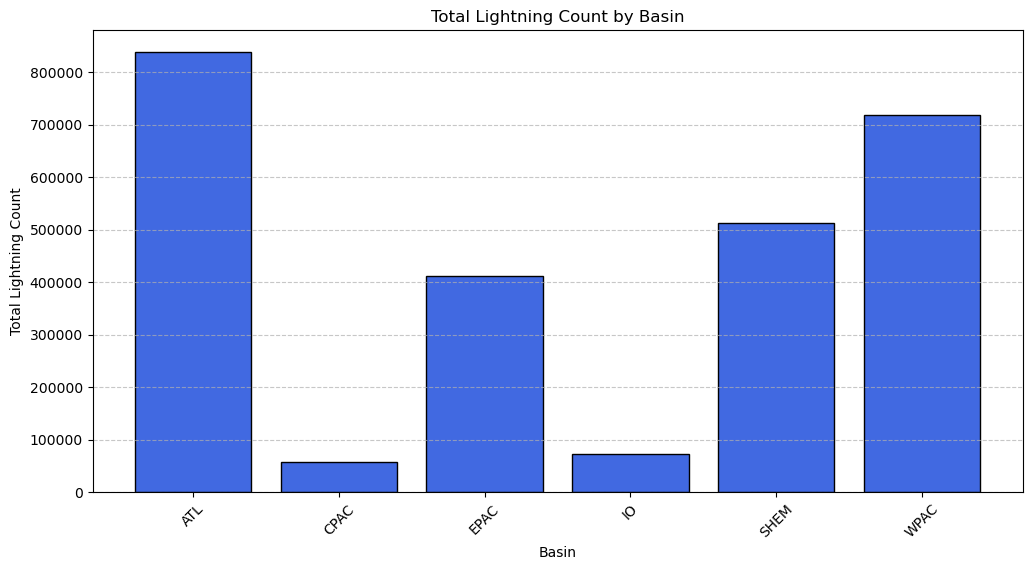

In [52]:
import matplotlib.pyplot as plt

# Group by 'basin' and sum 'lightning count'
basin_lightning = inner_core_joined.groupby('basin')['lightning_count'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(basin_lightning['basin'], basin_lightning['lightning_count'], color='royalblue', edgecolor='black')

# Labels and title
plt.xlabel('Basin')
plt.ylabel('Total Lightning Count')
plt.title('Total Lightning Count by Basin')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


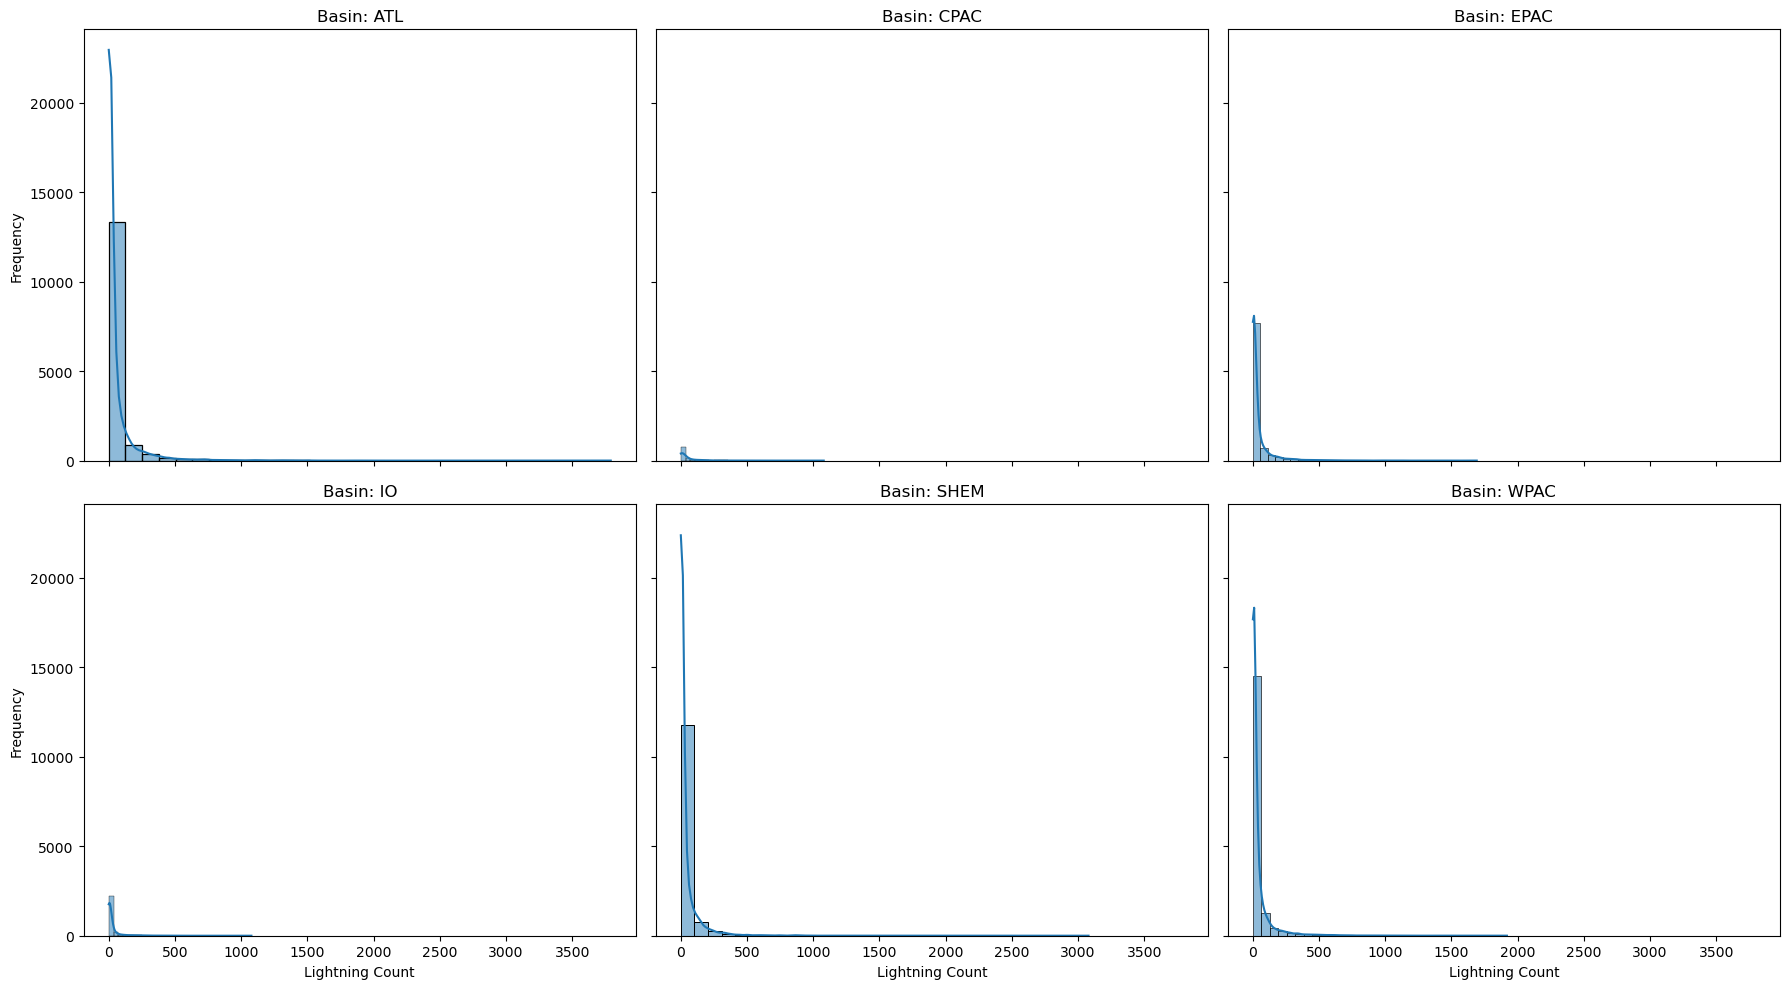

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zero lightning counts
filtered_data = inner_core_joined[inner_core_joined['lightning_count'] > 0]

# Group by basin
basins = filtered_data['basin'].unique()

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each basin and plot
for i, basin in enumerate(basins):
    ax = axes[i]
    sns.histplot(filtered_data[filtered_data['basin'] == basin]['lightning_count'], bins=30, ax=ax, kde=True)
    
    ax.set_title(f'Basin: {basin}')
    ax.set_xlabel('Lightning Count')
    ax.set_ylabel('Frequency')

# Remove empty subplots if basins < 6
for j in range(len(basins), 6):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


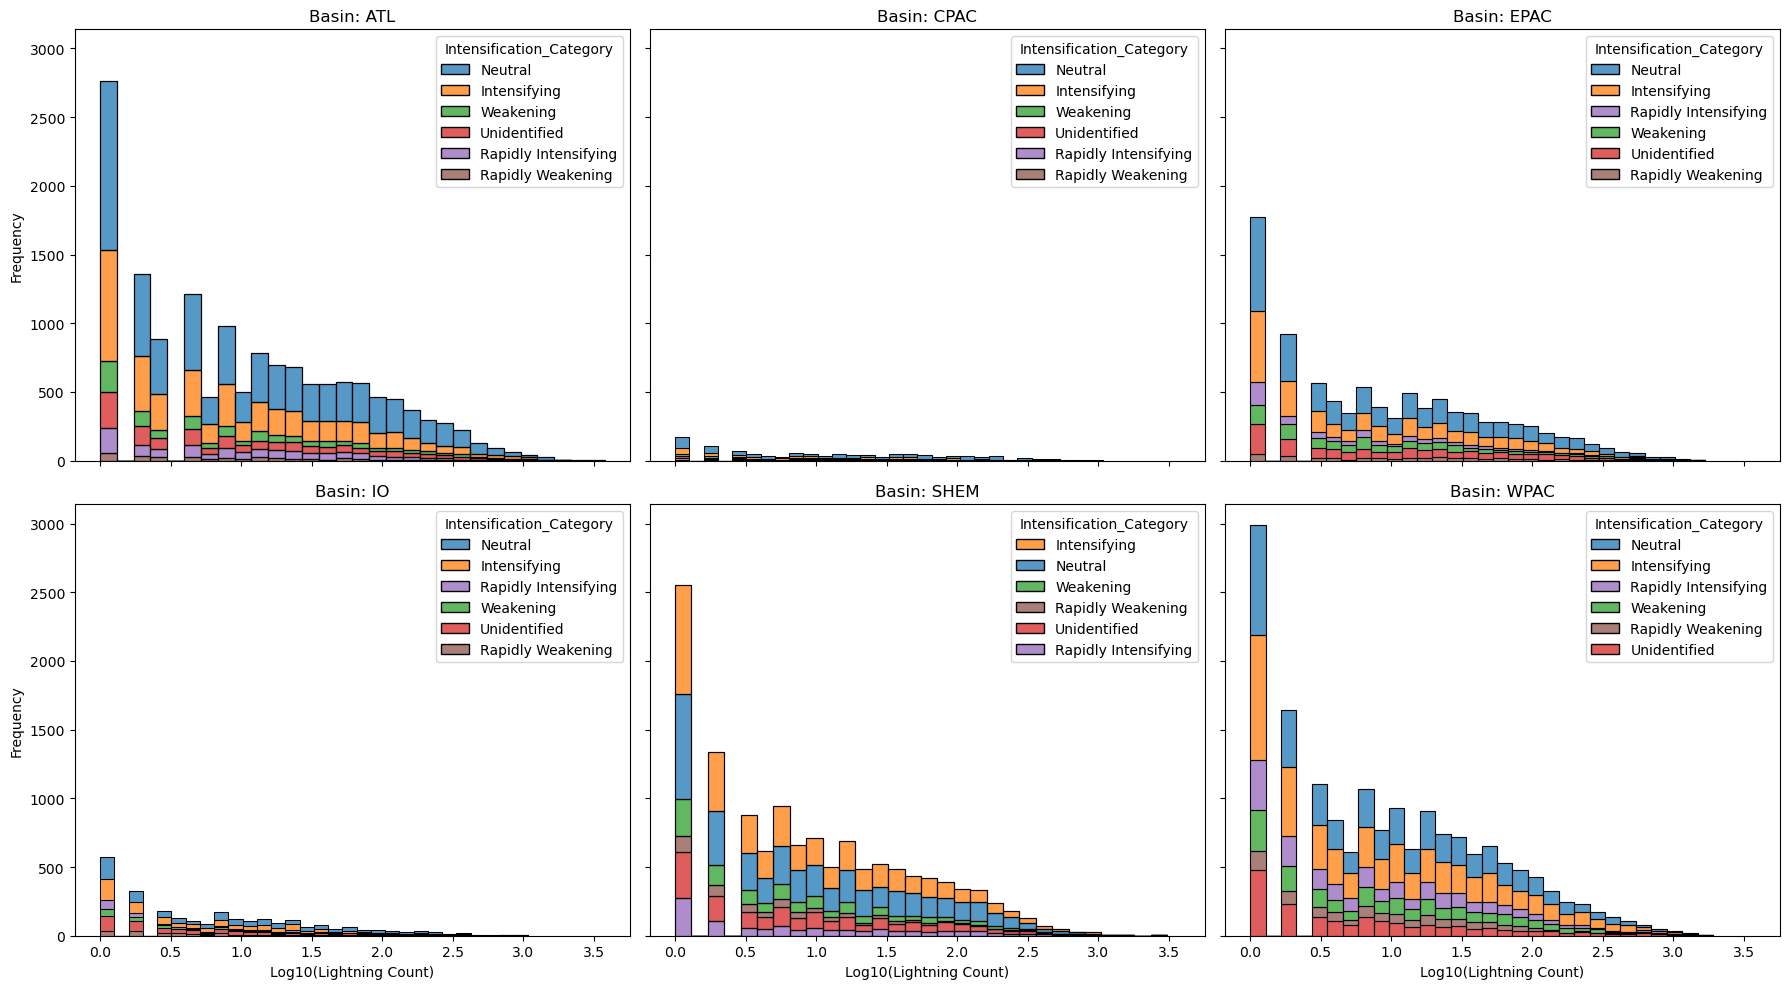

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out zero lightning counts
filtered_data = inner_core_joined[inner_core_joined['lightning_count'] > 0].copy()

# Log-transform the lightning count
filtered_data['log_lightning_count'] = np.log10(filtered_data['lightning_count'])

# Get unique basins
basins = filtered_data['basin'].unique()

# Get unique categories and assign consistent colors
unique_categories = filtered_data['Intensification_Category'].unique()
palette = sns.color_palette("tab10", len(unique_categories))  # Using a fixed palette
category_colors = {category: palette[i] for i, category in enumerate(unique_categories)}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each basin and plot
for i, basin in enumerate(basins):
    ax = axes[i]
    
    # Filter data for the current basin
    basin_data = filtered_data[filtered_data['basin'] == basin]
    
    # Plot stacked histogram with consistent colors
    sns.histplot(
        data=basin_data, 
        x='log_lightning_count', 
        hue='Intensification_Category', 
        multiple='stack',  # Stacked bars
        bins=30, 
        ax=ax,
        palette=category_colors  # Apply consistent colors
    )
    
    ax.set_title(f'Basin: {basin}')
    ax.set_xlabel('Log10(Lightning Count)')
    ax.set_ylabel('Frequency')

# Remove empty subplots if basins < 6
for j in range(len(basins), 6):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


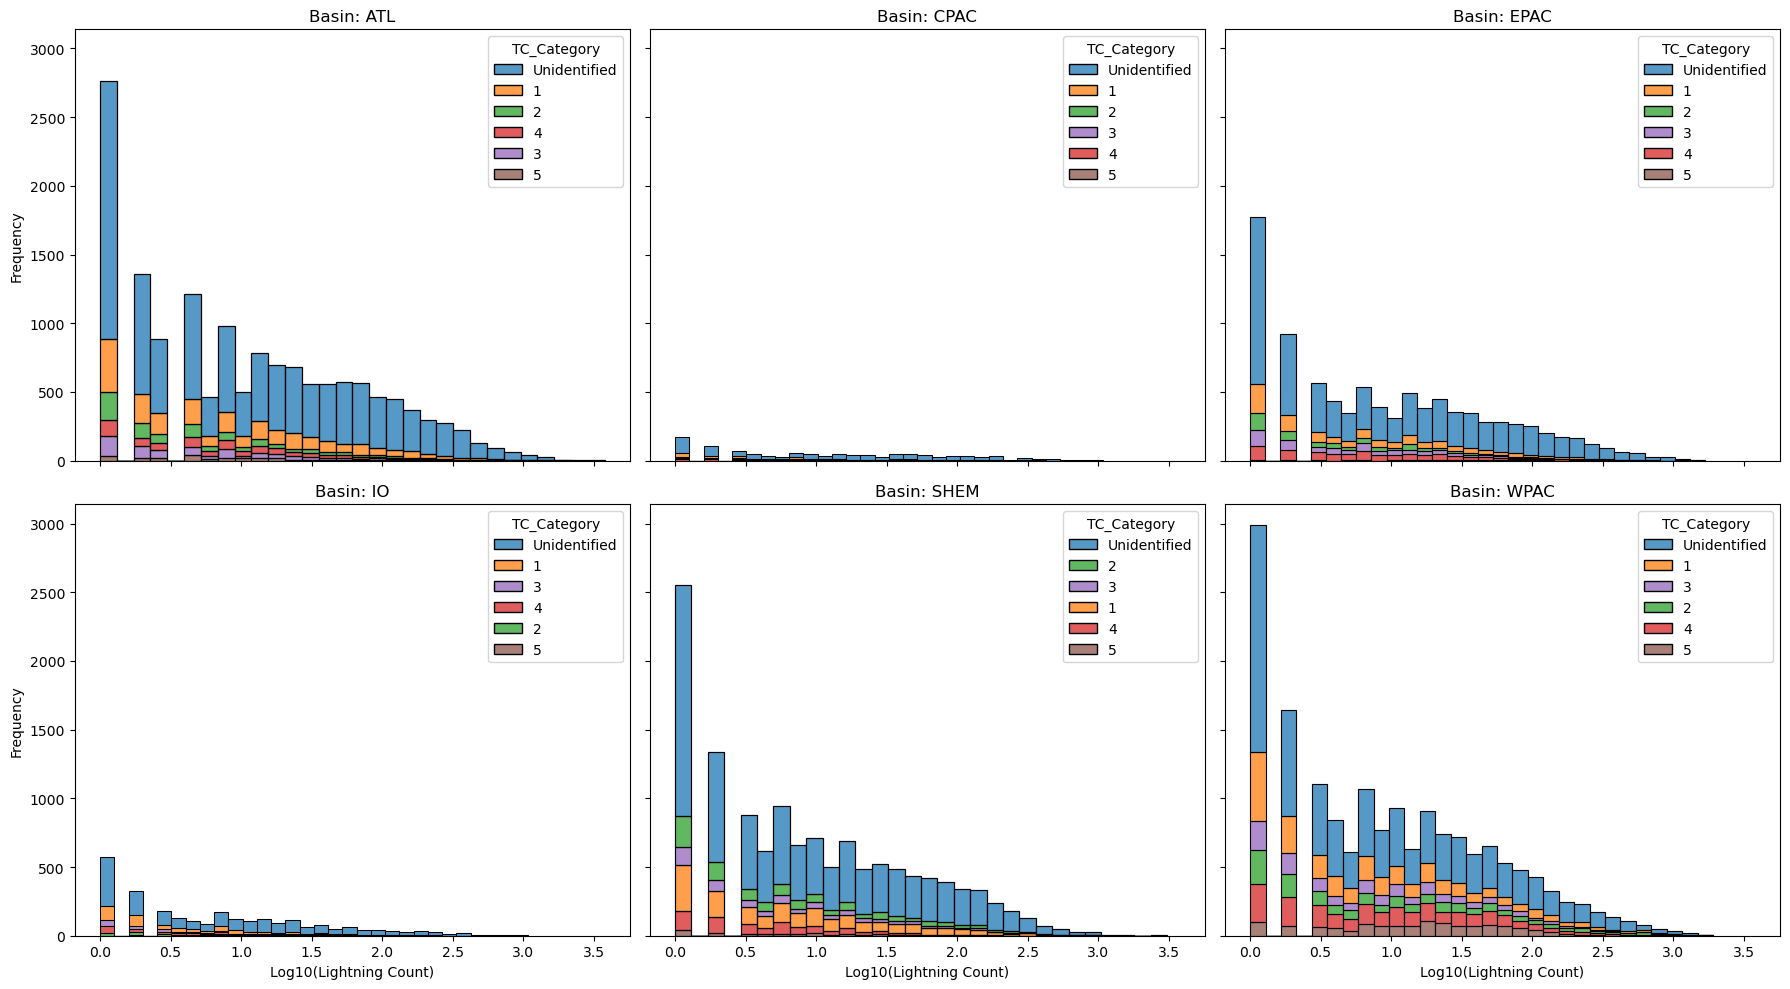

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out zero lightning counts
filtered_data = inner_core_joined[inner_core_joined['lightning_count'] > 0].copy()

# Log-transform the lightning count
filtered_data['log_lightning_count'] = np.log10(filtered_data['lightning_count'])

# Get unique basins
basins = filtered_data['basin'].unique()

# Get unique categories and assign consistent colors
unique_categories = filtered_data['TC_Category'].unique()
palette = sns.color_palette("tab10", len(unique_categories))  # Using a fixed palette
category_colors = {category: palette[i] for i, category in enumerate(unique_categories)}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each basin and plot
for i, basin in enumerate(basins):
    ax = axes[i]
    
    # Filter data for the current basin
    basin_data = filtered_data[filtered_data['basin'] == basin]
    
    # Plot stacked histogram with consistent colors
    sns.histplot(
        data=basin_data, 
        x='log_lightning_count', 
        hue='TC_Category', 
        multiple='stack',  # Stacked bars
        bins=30, 
        ax=ax,
        palette=category_colors  # Apply consistent colors
    )
    
    ax.set_title(f'Basin: {basin}')
    ax.set_xlabel('Log10(Lightning Count)')
    ax.set_ylabel('Frequency')

# Remove empty subplots if basins < 6
for j in range(len(basins), 6):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


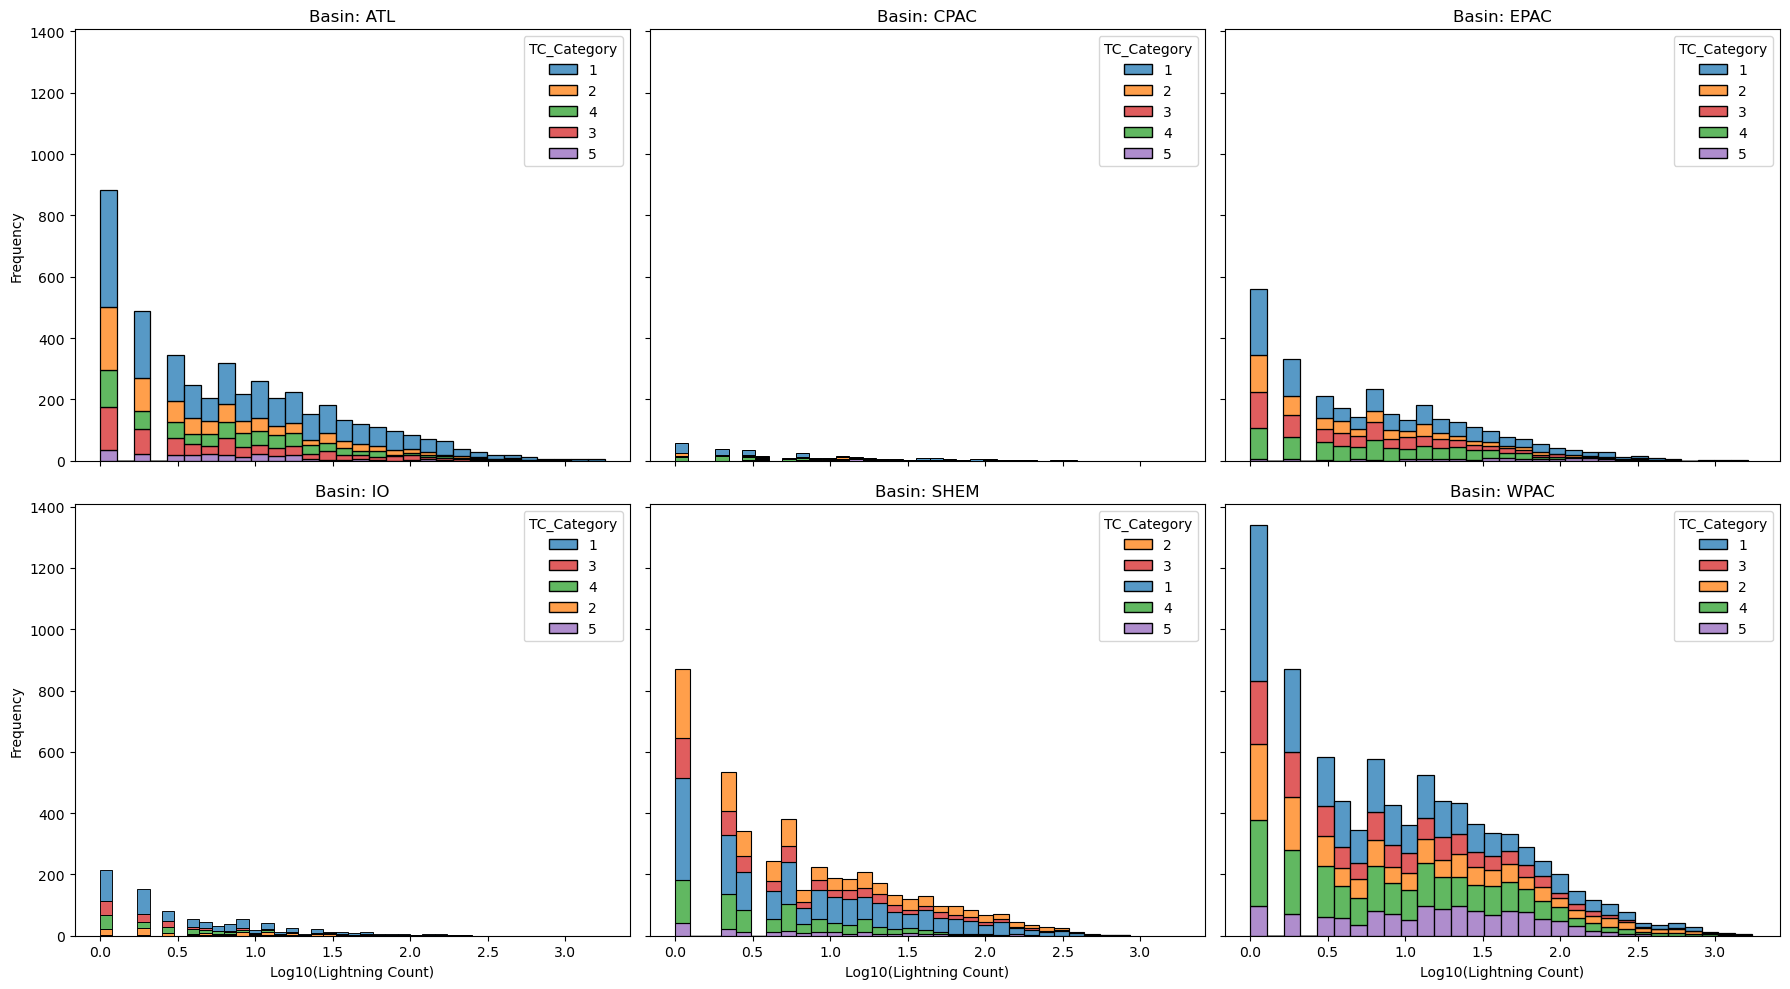

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out zero lightning counts
filtered_data = inner_core_joined[
    (inner_core_joined['lightning_count'] > 0) & 
    (inner_core_joined['TC_Category'] != 'Unidentified')
].copy()
# Log-transform the lightning count
filtered_data['log_lightning_count'] = np.log10(filtered_data['lightning_count'])

# Get unique basins
basins = filtered_data['basin'].unique()

# Get unique categories and assign consistent colors
unique_categories = filtered_data['TC_Category'].unique()
palette = sns.color_palette("tab10", len(unique_categories))  # Using a fixed palette
category_colors = {category: palette[i] for i, category in enumerate(unique_categories)}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each basin and plot
for i, basin in enumerate(basins):
    ax = axes[i]
    
    # Filter data for the current basin
    basin_data = filtered_data[filtered_data['basin'] == basin]
    
    # Plot stacked histogram with consistent colors
    sns.histplot(
        data=basin_data, 
        x='log_lightning_count', 
        hue='TC_Category', 
        multiple='stack',  # Stacked bars
        bins=30, 
        ax=ax,
        palette=category_colors  # Apply consistent colors
    )
    
    ax.set_title(f'Basin: {basin}')
    ax.set_xlabel('Log10(Lightning Count)')
    ax.set_ylabel('Frequency')

# Remove empty subplots if basins < 6
for j in range(len(basins), 6):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
